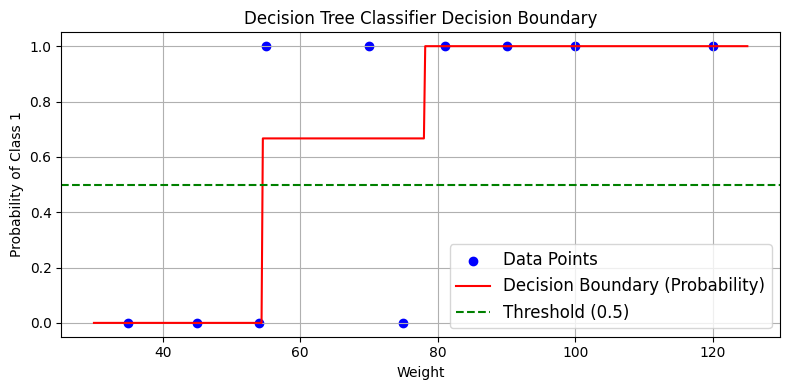

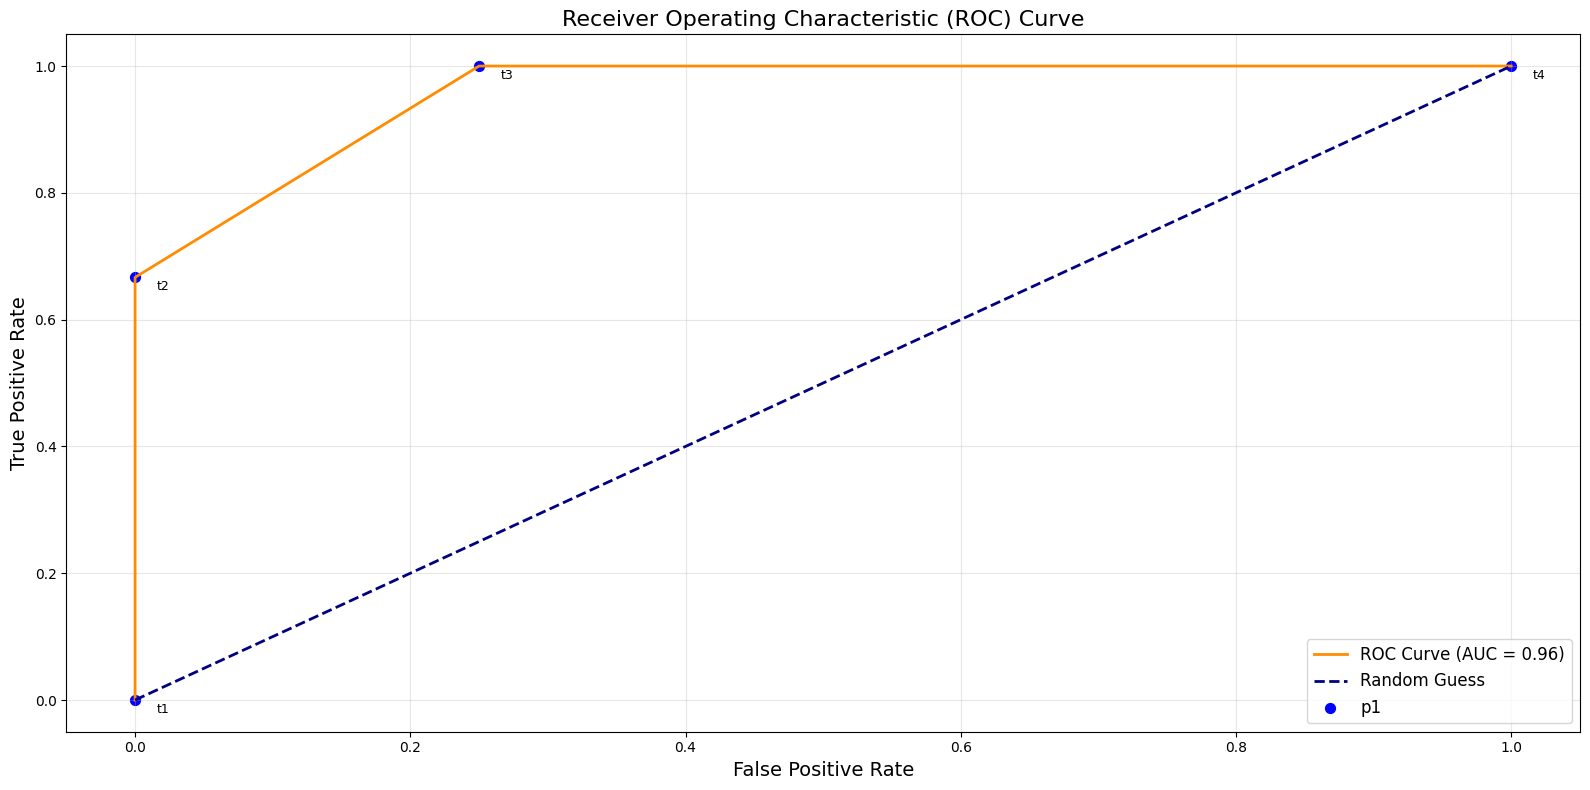

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Dataset
weights = np.array([35, 45, 54, 55, 70, 75, 81, 90, 100, 120]).reshape(-1, 1)  # Reshape for sklearn compatibility
# heights = np.array([126, 143, 156, 131, 147, 184, 159, 167, 176, 193])
target = np.array([   0,    0,   0,   1,  1,   0,    1,   1,   1,   1])

# Combine weights and target into a 2D feature matrix
X = np.column_stack((weights, heights))
X = weights
target = np.array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1])

# Split data into train and test sets

# Random Forest Classifier
random_forest = RandomForestClassifier(max_depth=2, n_estimators=25, bootstrap=False)
random_forest.fit(weights, target)


# Predict probabilities for the test set
y_pred_prob = random_forest.predict_proba(weights)[:, 1]

# Create a range of values for weights to predict
x_range = np.linspace(weights.min() - 5, weights.max() + 5, 500).reshape(-1, 1)

# Predict probabilities for the range
y_prob = random_forest.predict_proba(x_range)[:, 1]

# Plot data points
plt.figure(figsize=(8, 4))

plt.scatter(weights, target, color='blue', label='Data Points')
plt.plot(x_range, y_prob, color='red', label='Decision Boundary (Probability)')
plt.axhline(0.5, color='green', linestyle='--', label='Threshold (0.5)')
plt.xlabel('Weight')
plt.ylabel('Probability of Class 1')
plt.title('Decision Tree Classifier Decision Boundary')
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=1)
plt.tight_layout()
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(target, y_pred_prob)
roc_auc = auc(fpr, tpr)



# Plot ROC Curve
plt.figure(figsize=(16, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guess")

# Add points for p1-p10
for i, (fp, tp) in enumerate(zip(fpr, tpr)):
    plt.scatter(fp, tp, color='blue', s=50, label=f"p{i+1}" if i == 0 else None)
    plt.text(fp + 0.02, tp - 0.02, f"t{i+1}", fontsize=9, ha='center')

# Enhancements
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show plot
plt.show()

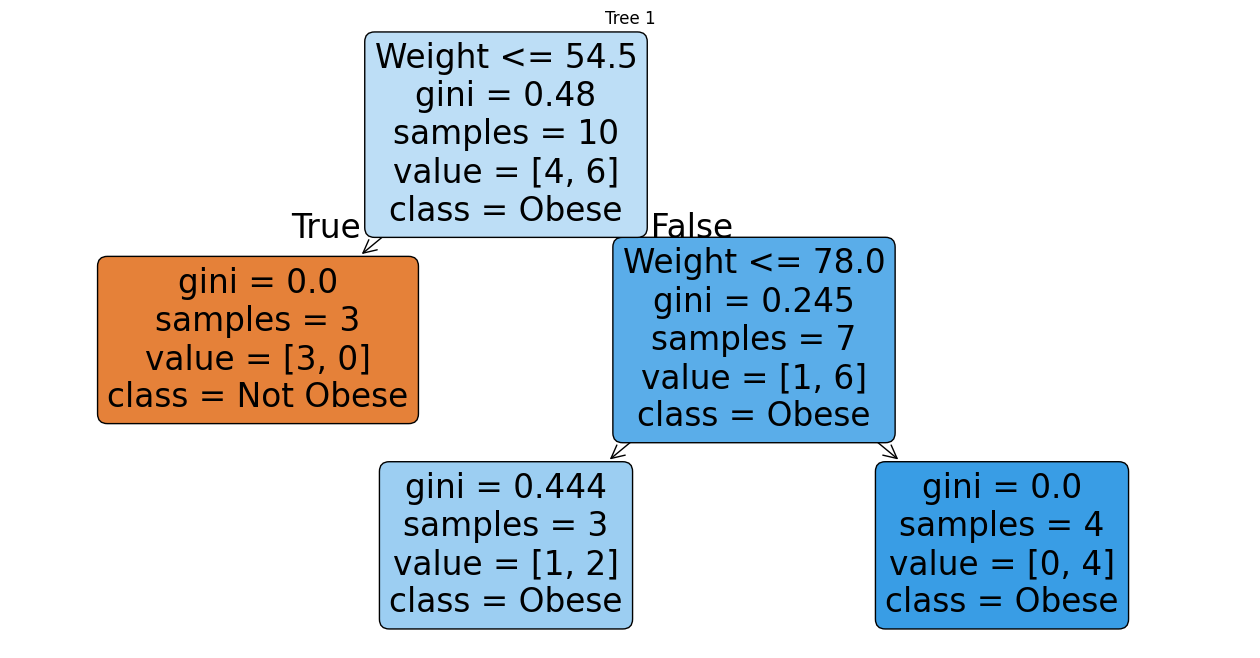

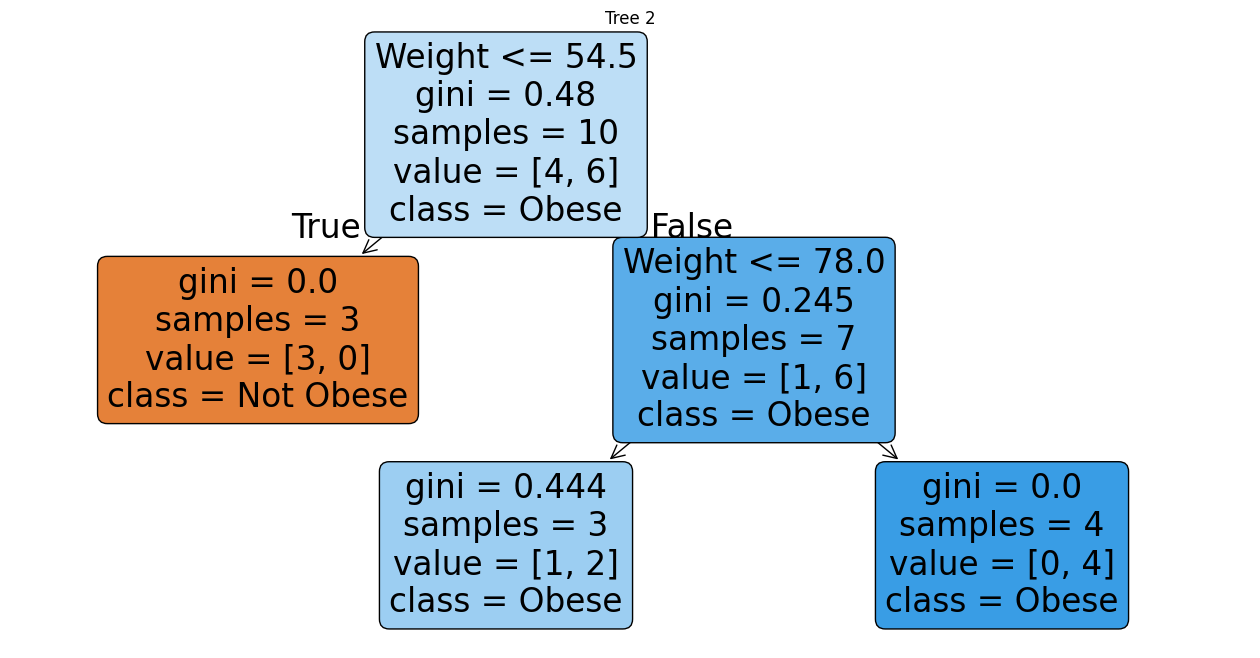

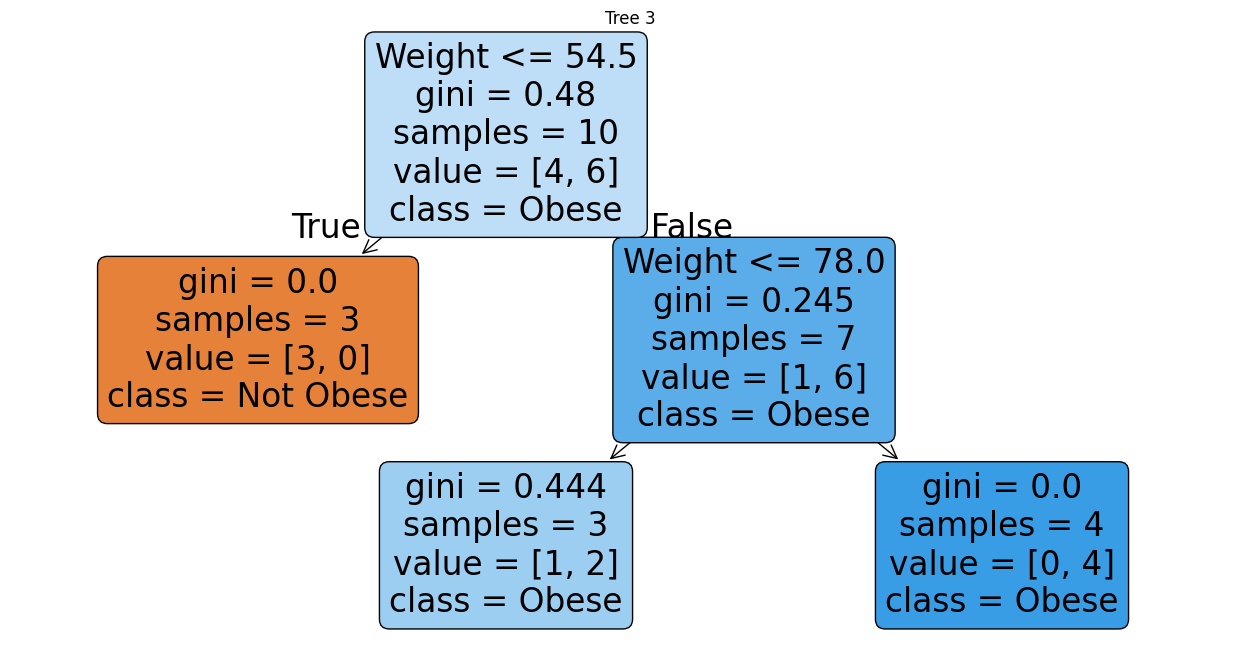

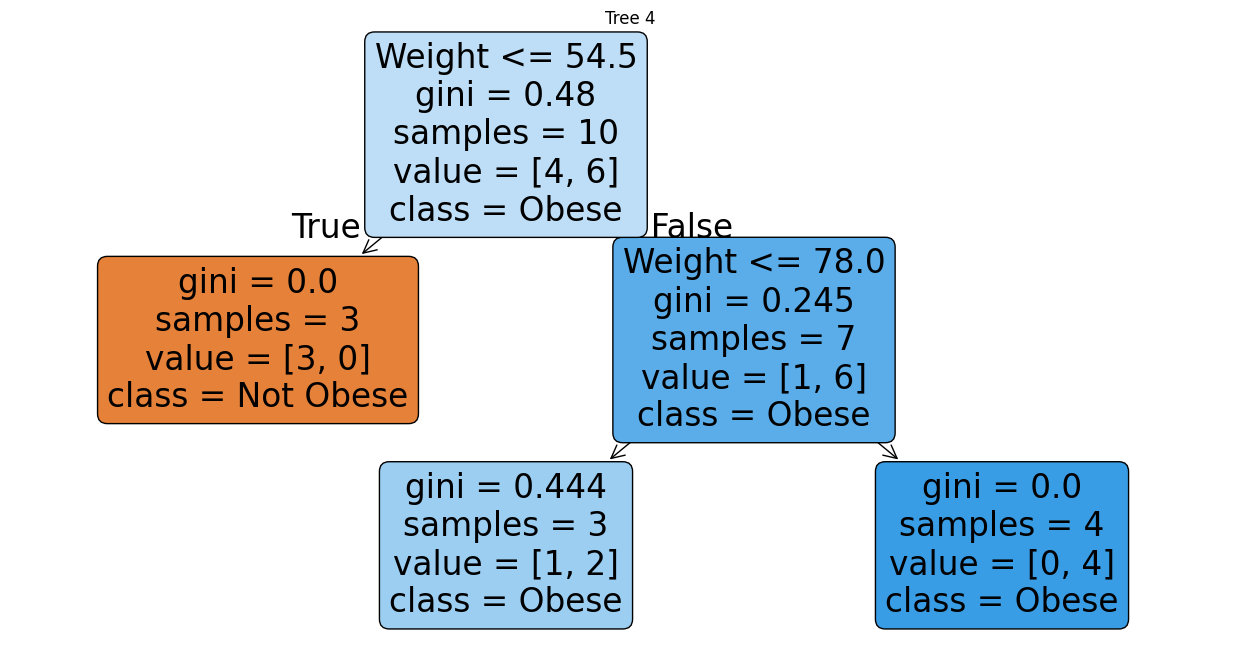

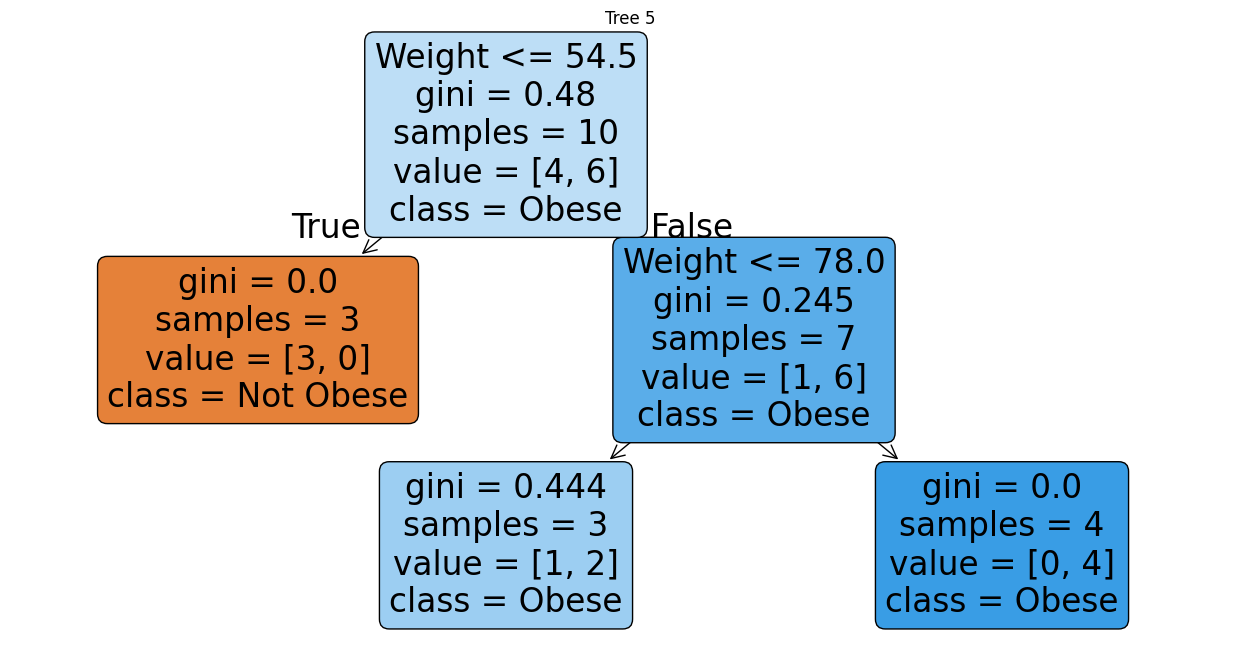

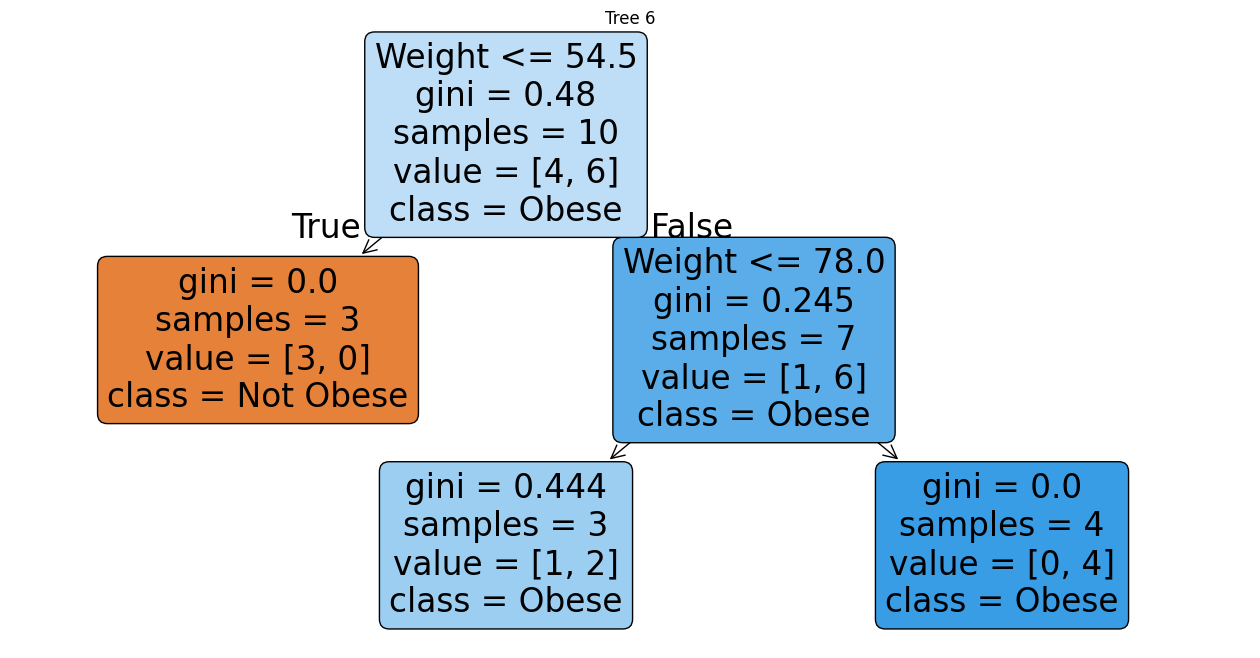

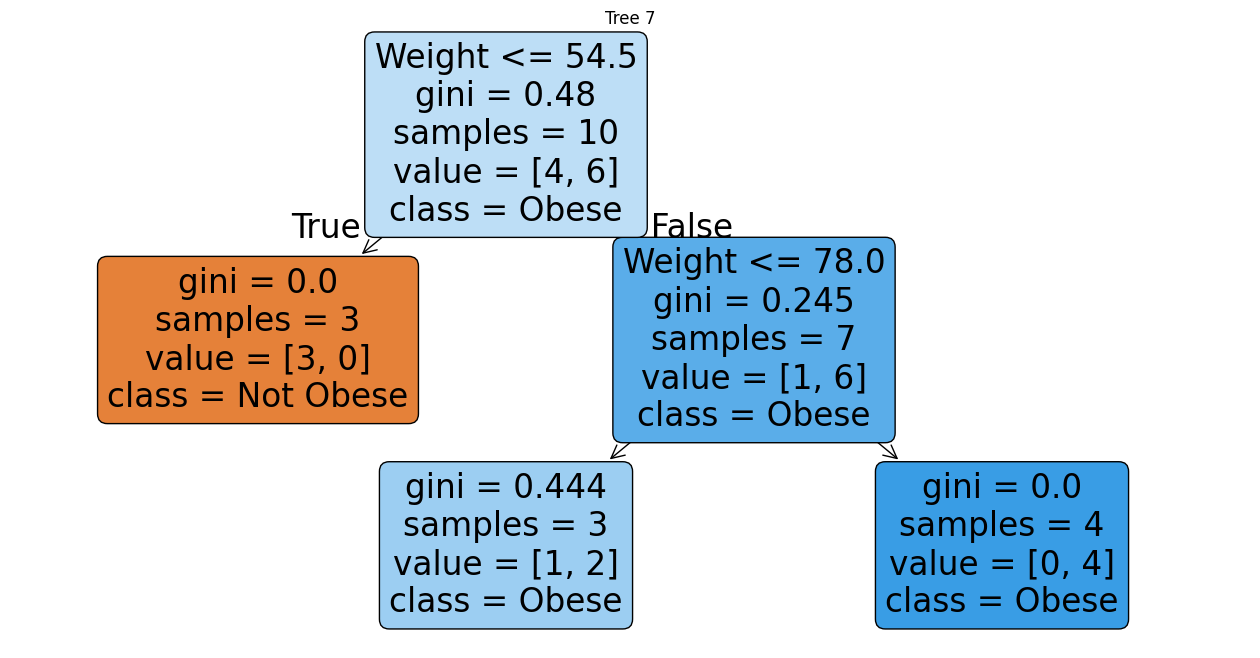

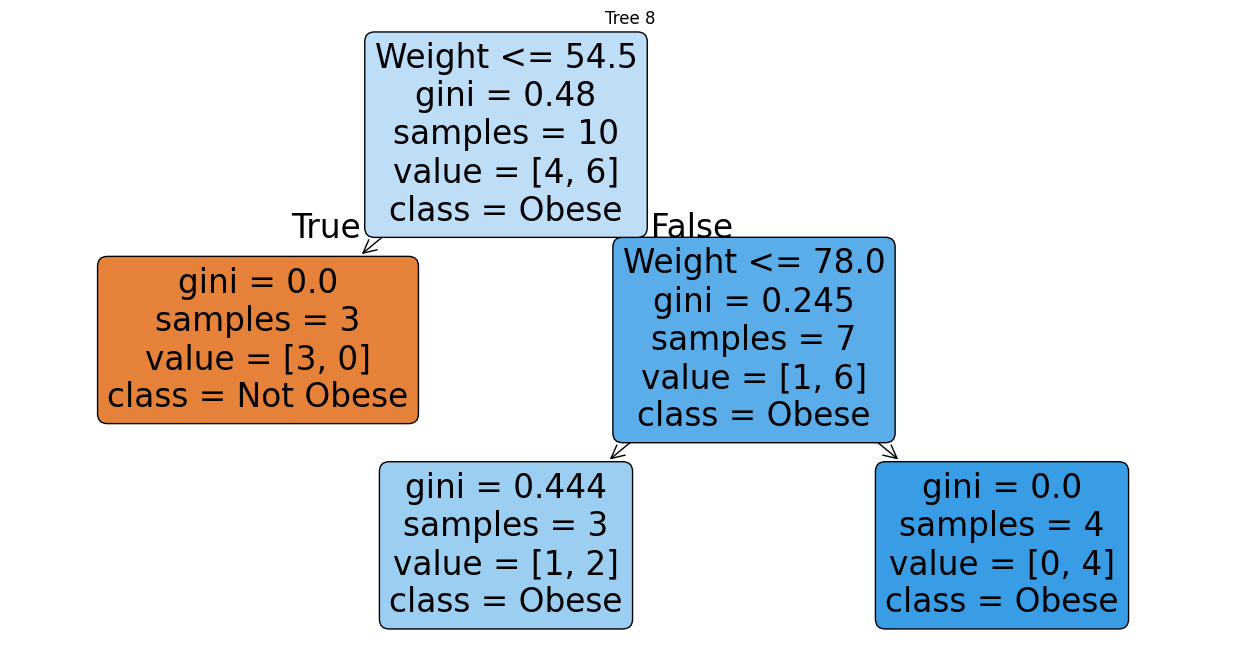

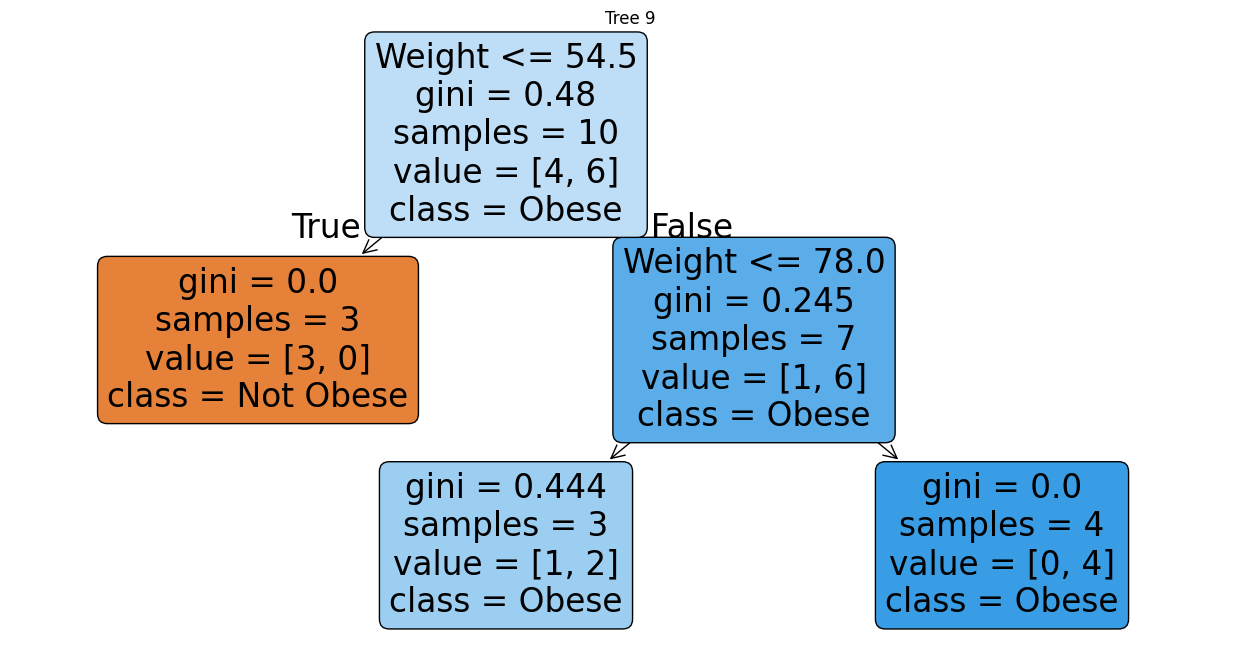

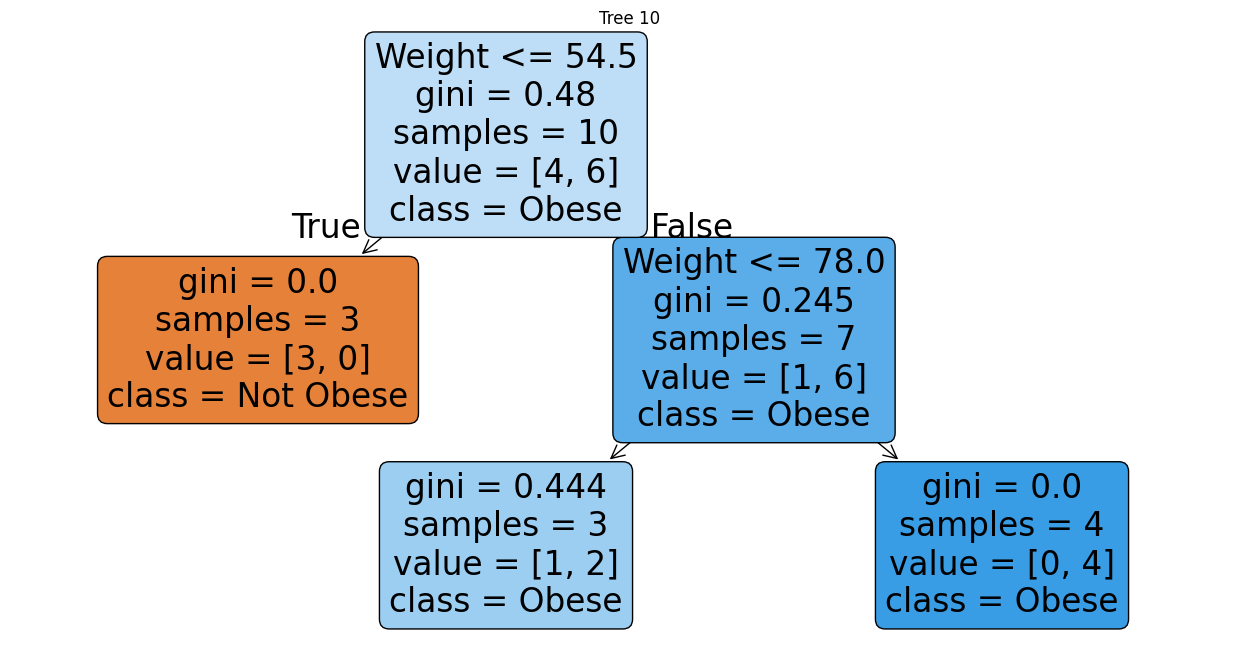

In [2]:
# Plot individual trees
for i, tree in enumerate(random_forest.estimators_):
    plt.figure(figsize=(16, 8))
    plot_tree(tree, feature_names=["Weight"], class_names=["Not Obese", "Obese"], filled=True, rounded=True)
    plt.title(f"Tree {i+1}")
    plt.show()

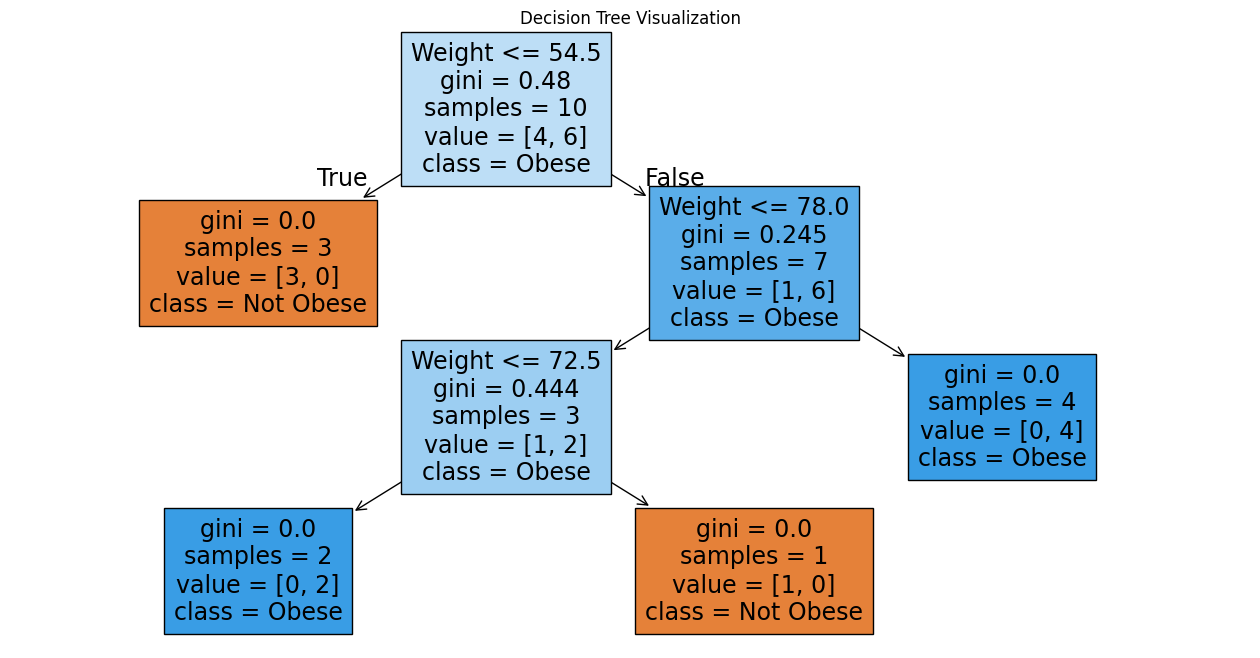

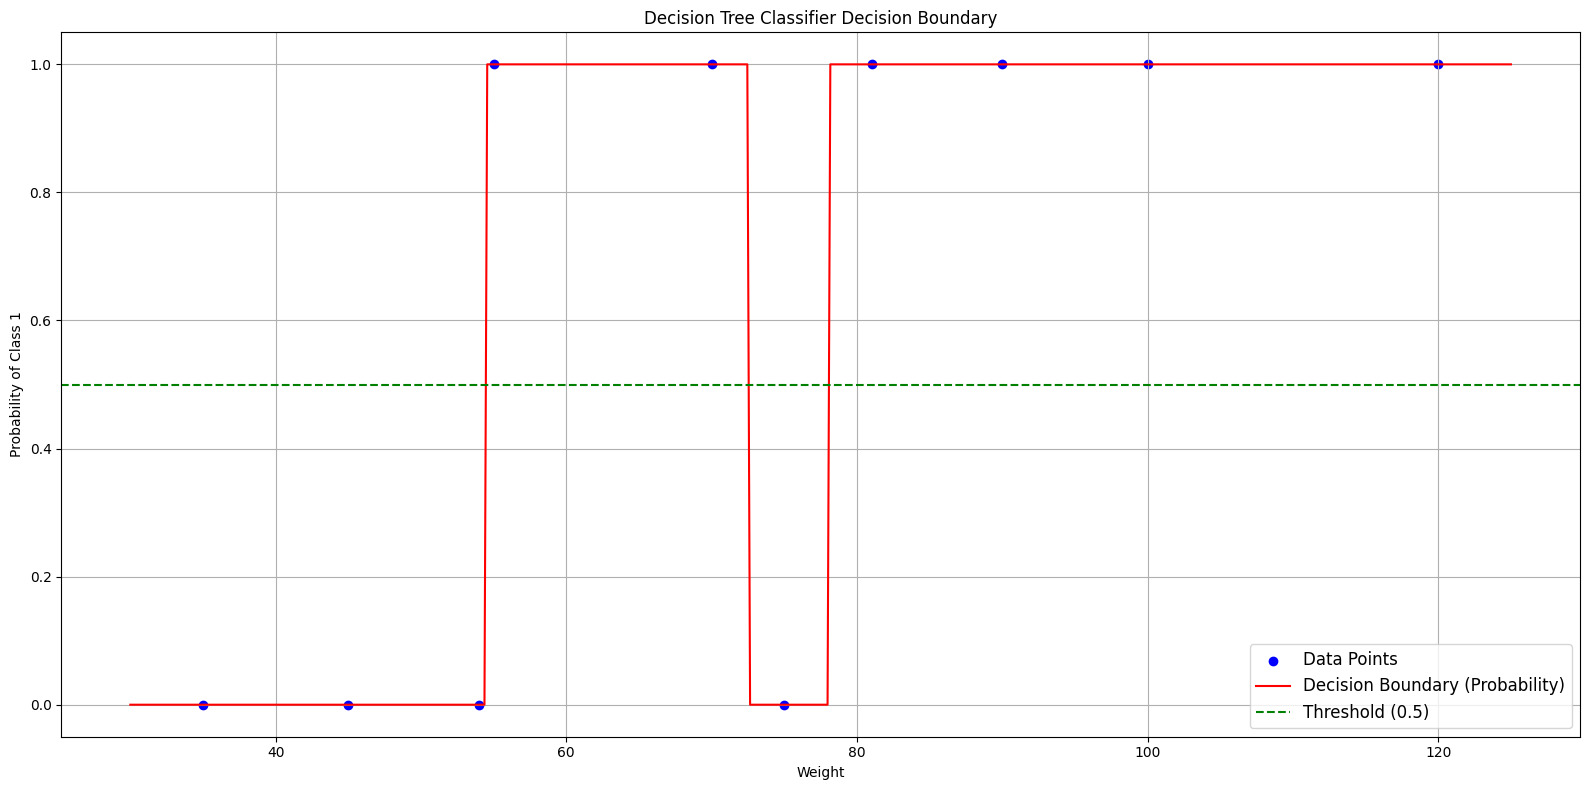

In [3]:
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=3)
decision_tree.fit(weights, target)

# Plot Decision Tree
plt.figure(figsize=(16, 8))
plot_tree(
    decision_tree,
    feature_names=["Weight"],
    class_names=["Not Obese", "Obese"],
    filled=True,
)
plt.title("Decision Tree Visualization")

plt.figure(figsize=(16, 8))
# Create a range of values for weights to predict
x_range = np.linspace(weights.min() - 5, weights.max() + 5, 500).reshape(-1, 1)
# Predict probabilities for the range
y_prob = decision_tree.predict_proba(x_range)[:, 1]
# Plot data points
plt.scatter(weights, target, color='blue', label='Data Points')
plt.plot(x_range, y_prob, color='red', label='Decision Boundary (Probability)')
plt.axhline(0.5, color='green', linestyle='--', label='Threshold (0.5)')
plt.xlabel('Weight')
plt.ylabel('Probability of Class 1')
plt.title('Decision Tree Classifier Decision Boundary')
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=1)
plt.tight_layout()
plt.show()

In [4]:
# [0,   0,  0,  1,  1,  0,  1,  1,   1,   1]
# [35, 45, 54, 55, 70, 75, 81, 90, 100, 120]
m = weights > 54.5
w = weights[m]
# m = w < 78
# w = w[m]

# w = w[w<=78]
print(w)
(
    1-((4/10)**2+(6/10)**2 ),

    1-((1/7)**2+(6/7)**2 ),
)

[ 55  70  75  81  90 100 120]


(0.48, 0.24489795918367352)

In [5]:
import numpy as np
import pandas as pd

# Function to calculate Gini Impurity
def gini_impurity(groups, classes):
    total_samples = sum([len(group) for group in groups])
    gini = 0.0
    for group in groups:
        size = len(group)
        if size == 0:  # Avoid division by zero
            continue
        score = 0.0
        for class_val in classes:
            proportion = (group.count(class_val)) / size
            score += proportion ** 2
        gini += (1 - score) * (size / total_samples)
    return gini

# Function to evaluate all possible splits
def evaluate_splits(weights, target):
    unique_thresholds = np.unique(weights)
    split_results = []
    classes = np.unique(target)

    for i in range(len(unique_thresholds) - 1):
        threshold = (unique_thresholds[i] + unique_thresholds[i + 1]) / 2

        # Split into left and right groups
        left_group = [target[j] for j in range(len(weights)) if weights[j] <= threshold]
        right_group = [target[j] for j in range(len(weights)) if weights[j] > threshold]

        # Compute Gini Impurity
        gini = gini_impurity([left_group, right_group], classes)
        split_results.append((threshold, gini))

    return pd.DataFrame(split_results, columns=["Split Threshold", "Gini Impurity"])

# Compute Gini Impurity for all splits
split_gini_table = evaluate_splits(weights, target)
split_gini_table


,Split Threshold,Gini Impurity
0,40.0,0.400000
1,49.5,0.300000
2,54.5,0.171429
3,62.5,0.316667
4,72.5,0.400000
5,78.0,0.266667
6,85.5,0.342857
7,95.0,0.400000
8,110.0,0.444444


In [6]:
1-(0/5)**2-(5/5)**2

0.0

In [7]:
split_gini_table = evaluate_splits(w, [1,  1,  0,  1,  1,   1,   1])
split_gini_table

,Split Threshold,Gini Impurity
0,62.5,0.238095
1,72.5,0.228571
2,78.0,0.190476
3,85.5,0.214286
4,95.0,0.228571
5,110.0,0.238095


array([0.6575188, 0.3424812])

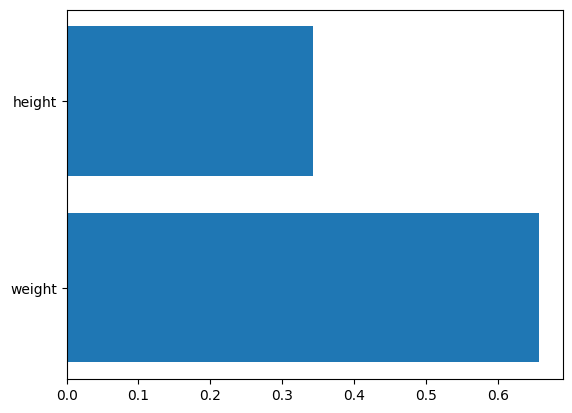

In [25]:

X = np.column_stack((weights, heights))
target = np.array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1])

# Split data into train and test sets

# Random Forest Classifier
random_forest = RandomForestClassifier(max_depth=2, n_estimators=10, bootstrap=False)
random_forest.fit(X, target)


# Get Feature Importance
importances = random_forest.feature_importances_
features = ['weight', 'height']  # If using a DataFrame

# # Plot Importance
plt.barh(features, importances)
# plt.xlabel('Importance Score')
# plt.ylabel('Feature')
# plt.title('Feature Importance')
# plt.show()
importances